In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/Tree_Species_Dataset'

In [ ]:
# Check folder names (species classes)
import os
print("Class folders:")
print(os.listdir(data_dir))

Class folders:
['sugarcane', 'pipal', 'saptaparni', 'shirish', 'sonmahor', 'pilikaren', 'other', 'simlo', 'sitafal', 'vad', 'neem', 'jamun', 'gulmohor', 'motichanoti', 'kesudo', 'kanchan', 'nilgiri', 'gunda', 'mango', 'khajur', 'coconut', 'banyan', 'asopalav', 'bamboo', 'amla', 'cactus', 'garmalo', 'champa', 'bili', 'babul']


In [ ]:
class_dirs = os.listdir(data_dir)
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 30


In [ ]:
import glob

image_paths=[]
labels=[]

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            image_paths.append(os.path.join(class_path, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")


Total images: 1454


In [ ]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

           Image Count
other              125
sugarcane           50
neem                50
bamboo              50
sonmahor            49
shape:  (30, 1)


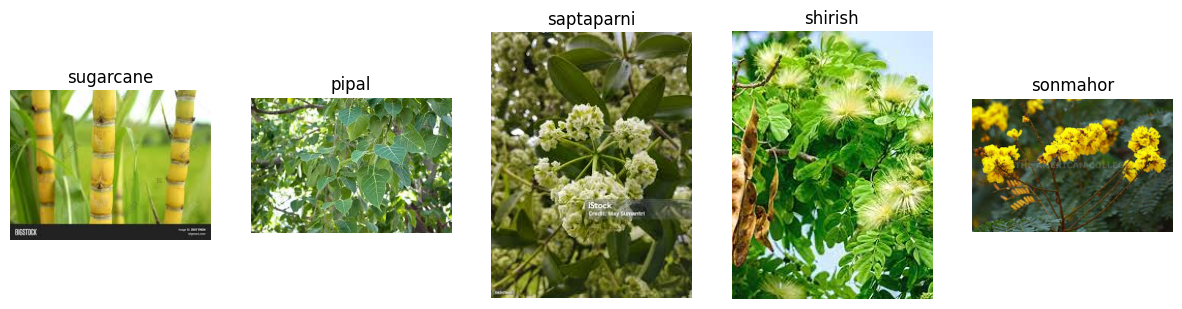

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os # Import os module explicitly

def show_sample_images(data_dir, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        class_path = os.path.join(data_dir, class_dir)
        # Check if the path is a directory and not empty
        if os.path.isdir(class_path) and os.listdir(class_path):
            # Select the first image file in the directory
            img_file = os.listdir(class_path)[0]
            img_path = os.path.join(class_path, img_file)
            try:
                img = Image.open(img_path)
                plt.subplot(1, n, i+1)
                plt.imshow(img)
                plt.title(class_dir)
                plt.axis('off')
            except Exception as e:
                print(f"Could not open image {img_path}: {e}")
    plt.show()

# Filter out the .git directory if it exists in class_dirs
class_dirs_filtered = [d for d in class_dirs if d != '.git']
show_sample_images(data_dir, class_dirs_filtered)

In [ ]:
image_shapes = []

for class_dir in class_dirs:
    # Skip the .git directory
    if class_dir == '.git':
        continue
    for img_file in os.listdir(os.path.join(data_dir, class_dir)):
        img_path = os.path.join(data_dir, class_dir, img_file)
        try:
            img = Image.open(img_path)
            image_shapes.append(img.size)
        except Exception as e:
            print(f"Could not open image {img_path}: {e}")


# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

,Width,Height
0,260,194
1,183,276
2,194,259
3,275,183
4,194,259


In [ ]:
print(shapes_df.describe())


             Width       Height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [ ]:
import hashlib
from collections import defaultdict
import os # Import os module

hashes = defaultdict(list)

# Filter out the .git directory
class_dirs_filtered = [d for d in class_dirs if d != '.git']

for class_dir in class_dirs_filtered:
    class_path = os.path.join(data_dir, class_dir)
    if os.path.isdir(class_path): # Check if it's a directory
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            # Check if it's a file before trying to open
            if os.path.isfile(img_path):
                try:
                    with open(img_path, 'rb') as f:
                        file_hash = hashlib.md5(f.read()).hexdigest()
                        hashes[file_hash].append(img_path)
                except Exception as e:
                    print(f"Could not process file {img_path}: {e}")


# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 0


In [ ]:
corrupt_images = []

for class_dir in class_dirs:
    # Skip the .git directory
    if class_dir == '.git':
        continue
    for img_file in os.listdir(os.path.join(data_dir, class_dir)):
        img_path = os.path.join(data_dir, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 0


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [ ]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 0 duplicate images.


In [ ]:
# Re-check to confirm duplicates removed
hashes = defaultdict(list)

# Filter out the .git directory
class_dirs_filtered = [d for d in class_dirs if d != '.git']

for class_dir in class_dirs_filtered:
    class_path = os.path.join(data_dir, class_dir)
    # Check if it's a directory before listing files
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            # Check if it's a file before opening
            if os.path.isfile(img_path):
                try:
                    with open(img_path, 'rb') as f:
                        file_hash = hashlib.md5(f.read()).hexdigest()
                        hashes[file_hash].append(img_path)
                except Exception as e:
                    print(f"Could not process file {img_path}: {e}")


duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [ ]:
from PIL import Image
import pandas as pd
import os # Import os module

# Gather image info
image_info = []

# Filter out the .git directory
class_dirs_filtered = [d for d in class_dirs if d != '.git']

for class_dir in class_dirs_filtered:
    class_path = os.path.join(data_dir, class_dir)
    # Check if it's a directory before listing files
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            # Check if it's a file before trying to open
            if os.path.isfile(img_path):
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        image_info.append({
                            'path': img_path,
                            'width': width,
                            'height': height,
                            'class': class_dir
                        })
                except Exception as e:
                    print(f"Could not process file {img_path}: {e}")


df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 0
🔺 Very large images: 0


In [ ]:

def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

In [ ]:

import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 0 outlier images (small + large).


In [ ]:
# Recalculate sizes
image_info = []

# Filter out the .git directory
class_dirs_filtered = [d for d in class_dirs if d != '.git']

for class_dir in class_dirs_filtered:
    class_path = os.path.join(data_dir, class_dir)
    # Check if it's a directory before listing files
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            # Check if it's a file before trying to open
            if os.path.isfile(img_path):
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        image_info.append({
                            'path': img_path,
                            'width': width,
                            'height': height,
                            'class': class_dir
                        })
                except Exception as e:
                     print(f"Could not process file {img_path}: {e}")


df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [ ]:
!pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 w

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,409 (16.09 MB)

 Trainable params: 167,838 (655.62 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.0413 - loss: 3.4497 - val_accuracy: 0.0903 - val_loss: 3.3847
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.0804 - loss: 3.3942 - val_accuracy: 0.0903 - val_loss: 3.3861
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.0761 - loss: 3.3930 - val_accuracy: 0.0903 - val_loss: 3.3808
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.0913 - loss: 3.3900 - val_accuracy: 0.0903 - val_loss: 3.3787
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.1026 - loss: 3.3758 - val_accuracy: 0.0903 - val_loss: 3.3773
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 135s 4s/step - accuracy: 0.0773 - loss: 3.3956 - val_accuracy: 0.0903 - val_loss: 3.3751
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.0913 - loss: 3.3893 - val_accuracy: 0.0903 - val_loss: 3.3768
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.0753 - loss: 3.3921 - val_accuracy: 0.0903 - v

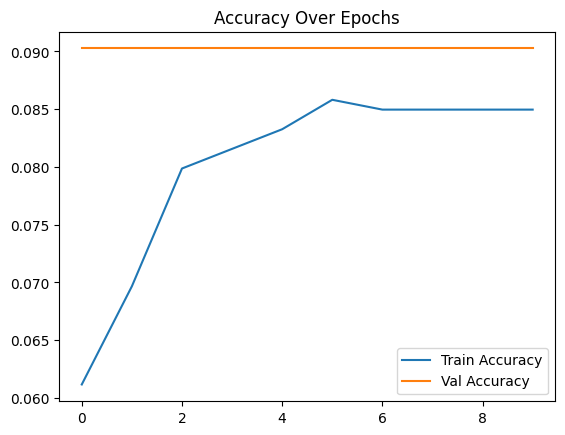

In [ ]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 30
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 171s 5s/step - accuracy: 0.0662 - loss: 3.7942 - val_accuracy: 0.0903 - val_loss: 3.2994
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.0819 - loss: 3.3168 - val_accuracy: 0.0903 - val_loss: 3.3554
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 175s 5s/step - accuracy: 0.0840 - loss: 3.2835 - val_accuracy: 0.1191 - val_loss: 3.1243
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 206s 5s/step - accuracy: 0.1373 - loss: 3.0938 - val_accuracy: 0.1552 - val_loss: 2.9988
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 176s 5s/step - accuracy: 0.1449 - loss: 3.0131 - val_accuracy: 0.1733 - val_loss: 2.9243
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 175s 5s/step - accuracy: 0.1953 - loss: 2.8585 - val_accuracy: 0.1986 - val_loss: 2.8548
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 177s 5s/step - accuracy: 0.2140 - loss: 2.8546 - val_accuracy: 0.2310 - val_loss: 2.6770
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 167s 5s/step - accuracy: 0.2207 - loss: 2.7776 - val_accuracy: 0.2419 - v

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


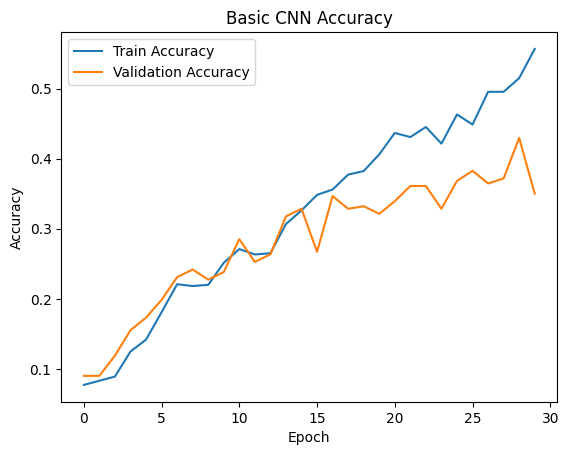

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()